# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\New folder (3)\Project Session\Tableu datasets\layoffs_data.csv")
df.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,JD.ID,Jakarta,Retail,200.0,0.30,2022-12-14,https://jakartaglobe.id/business/jdid-layoffs-...,5100.0,IPO,2022-12-15 02:19:38,Indonesia,Unknown
1,GoStudent,Vienna,Education,100.0,NaN,2022-12-14,https://www.businessinsider.com/gostudent-3-bi...,686.0,Series D,2022-12-15 02:11:42,Austria,Unknown
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,https://www.restaurantbusinessonline.com/amp/t...,64.0,Series C,2022-12-15 02:10:04,United States,Unknown
3,Landing,Birmingham,Real Estate,NaN,NaN,2022-12-14,https://www.al.com/business/2022/12/birmingham...,347.0,Series C,2022-12-15 02:10:48,United States,Unknown
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,Internal memo,698.0,Series I,2022-12-13 20:12:50,United States,Unknown


# EDA

In [3]:
df.columns

Index(['Company', 'Location', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1809 non-null   object 
 1   Location                    1809 non-null   object 
 2   Industry                    1809 non-null   object 
 3   Laid_Off_Count              1270 non-null   float64
 4   Percentage                  1221 non-null   float64
 5   Date                        1808 non-null   object 
 6   Source                      1809 non-null   object 
 7   Funds_Raised                1675 non-null   float64
 8   Stage                       1809 non-null   object 
 9   Date_Added                  1809 non-null   object 
 10  Country                     1809 non-null   object 
 11  List_of_Employees_Laid_Off  1809 non-null   object 
dtypes: float64(3), object(9)
memory usage: 169.7+ KB


In [5]:
df["List_of_Employees_Laid_Off"].value_counts()

Unknown                                                                                             1718
https://hopin.softr.app/                                                                               2
https://sites.google.com/view/tier-alumni-page                                                         1
https://docs.google.com/spreadsheets/d/1zvYja6G6a9MADN6ifwVBdZ8R34E4jej-qTQhdQoUUzk/edit               1
https://docs.google.com/spreadsheets/u/1/d/1ffu4J_b0g2B4YLo7xvls3U2turNuS-QB2Khv5Qcrlrk/htmlview       1
                                                                                                    ... 
https://docs.google.com/spreadsheets/d/1TAEhC3gGu_ooKIDSTiX9OYUIjAHf7doS-lYyzTR_miY/edit               1
https://docs.google.com/spreadsheets/u/1/d/1aJHTUlDqOomDd8dU45fg0ekQlPCm97dVWasvpj5bWmg/htmlview       1
https://docs.google.com/spreadsheets/d/1OoD3pVxFl718fnxs_cEaOIbcj-45-qNKZFnE1jQW86M/edit#gid=0         1
https://docs.google.com/spreadsheets/d/1YKzaAkolJv-rem3

In [6]:
df["Date_Added"].value_counts()

2020-03-28 20:52:49    40
2022-12-15 02:19:38     1
2020-12-17 17:19:48     1
2020-12-23 05:40:56     1
2020-11-12 20:04:09     1
                       ..
2022-08-09 14:40:05     1
2022-08-08 21:36:51     1
2022-08-09 21:47:18     1
2022-08-09 21:49:31     1
2022-12-03 05:20:31     1
Name: Date_Added, Length: 1770, dtype: int64

In [73]:
df["Year"]=pd.to_datetime(df["Date"]).dt.year
df["Month"]=pd.to_datetime(df["Date"]).dt.month
df["Day"]=pd.to_datetime(df["Date"]).dt.day


In [8]:
df.isnull().sum()

Company                         0
Location                        0
Industry                        0
Laid_Off_Count                539
Percentage                    588
Date                            1
Source                          0
Funds_Raised                  134
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      0
dtype: int64

In [9]:
df.drop(["List_of_Employees_Laid_Off","Date_Added","Source"],axis=1,inplace=True)

In [10]:
df

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,JD.ID,Jakarta,Retail,200.0,0.30,2022-12-14,5100.0,IPO,Indonesia
1,GoStudent,Vienna,Education,100.0,NaN,2022-12-14,686.0,Series D,Austria
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,64.0,Series C,United States
3,Landing,Birmingham,Real Estate,NaN,NaN,2022-12-14,347.0,Series C,United States
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,698.0,Series I,United States
...,...,...,...,...,...,...,...,...,...
1804,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,45.0,Unknown,United States
1805,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,1.0,Seed,United States
1806,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,90.0,Series C,United States
1807,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,12.0,Series A,United States


In [11]:
df.columns

Index(['Company', 'Location', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Funds_Raised', 'Stage', 'Country'],
      dtype='object')

# Data Visualisation

In [12]:
df["Company"].value_counts()

OYO                    5
Loft                   5
Uber                   5
Shopify                4
Patreon                4
                      ..
Perceptive Automata    1
OnlyFans               1
DeHaat                 1
Classkick              1
Homebound              1
Name: Company, Length: 1501, dtype: int64

In [13]:
df["Location"].value_counts()

SF Bay Area      479
New York City    204
Boston            83
Los Angeles       76
Seattle           61
                ... 
Zug                1
Düsseldorf         1
Reno               1
Helsinki           1
Tampa Bay          1
Name: Location, Length: 163, dtype: int64

In [14]:
#Top 20 Locations distribution

df["Location"].value_counts().head(20)

SF Bay Area       479
New York City     204
Boston             83
Los Angeles        76
Seattle            61
Bengaluru          60
London             56
Toronto            46
Sao Paulo          45
Berlin             43
Tel Aviv           41
Chicago            32
Singapore          29
Austin             28
Sydney             23
Jakarta            23
Salt Lake City     19
Mumbai             19
Portland           16
Atlanta            15
Name: Location, dtype: int64

<AxesSubplot:>

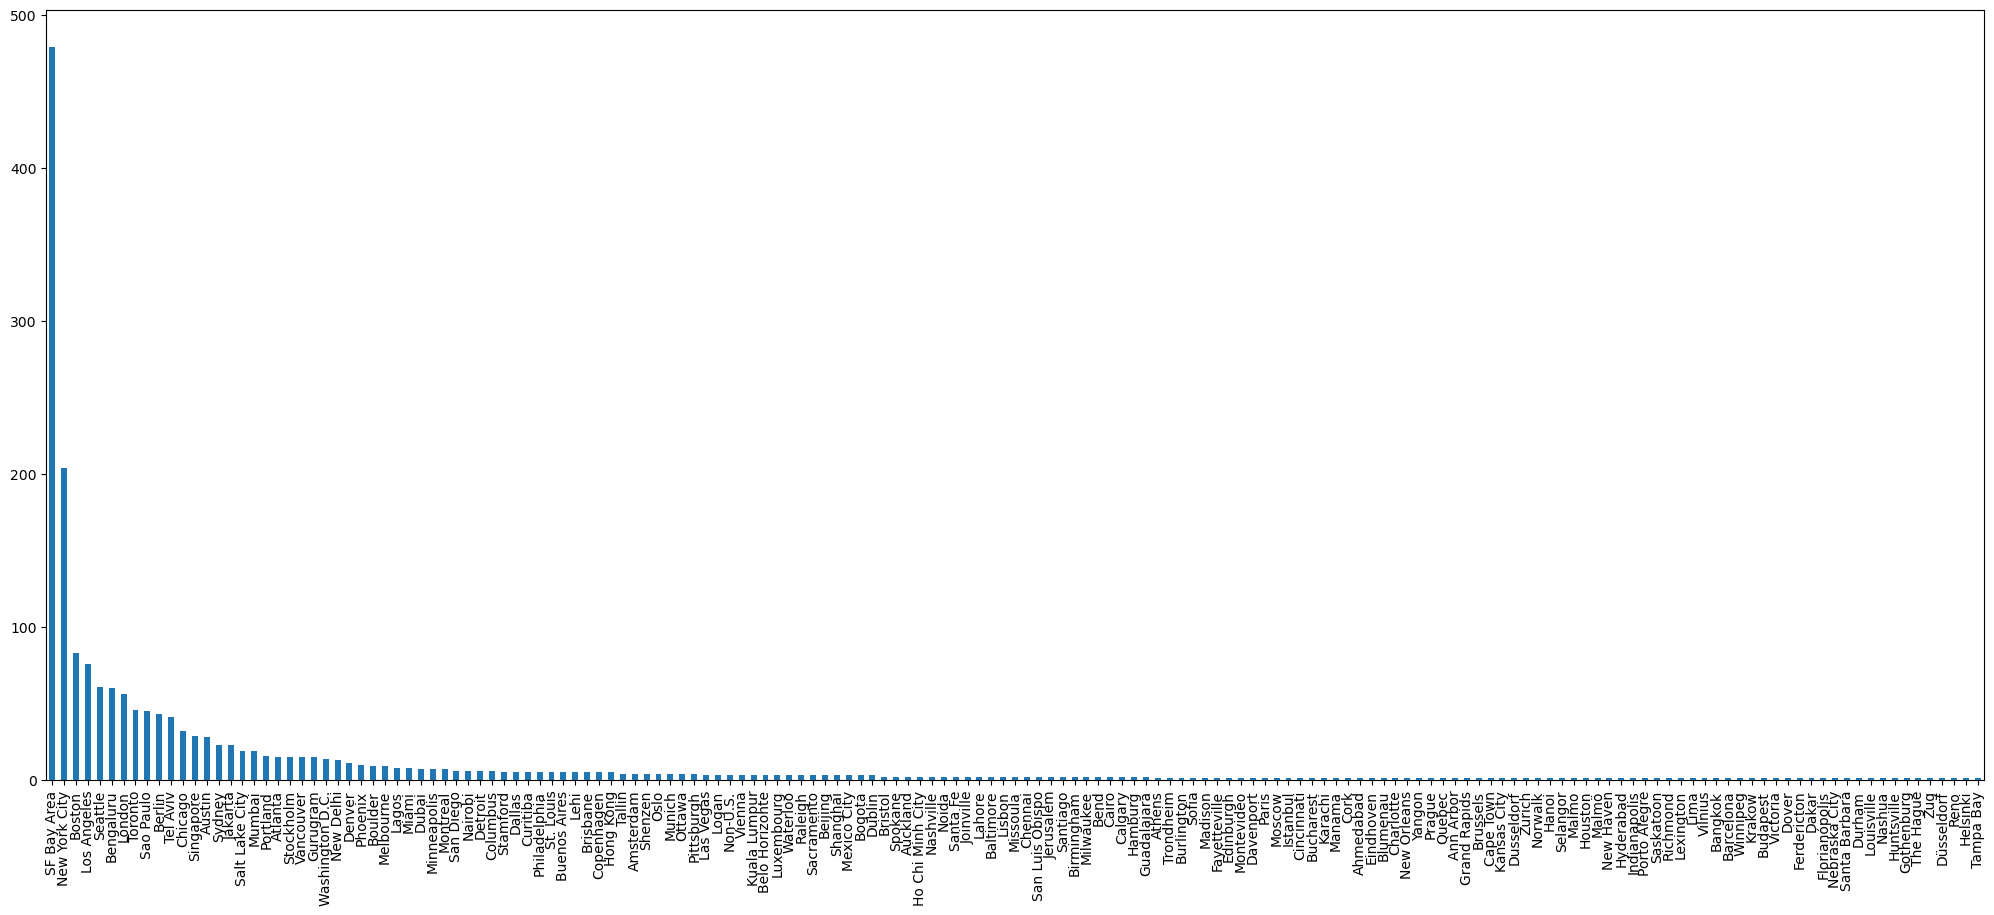

In [15]:
#Different Locations distribution in Dataset

plt.figure(figsize=(25,10))
df["Location"].value_counts().plot.bar()

In [16]:
#Industry Distribution In Dataset

df["Industry"].value_counts()

Finance           228
Retail            148
Healthcare        131
Food              114
Transportation    113
Marketing         112
Real Estate       104
Consumer           86
Other              80
Education          79
Media              76
Crypto             68
Travel             62
Data               60
Security           54
HR                 45
Infrastructure     36
Logistics          34
Product            28
Recruiting         28
Fitness            27
Sales              26
Support            26
Construction       13
Energy             11
Legal               8
Unknown             6
Aerospace           6
Name: Industry, dtype: int64

<AxesSubplot:>

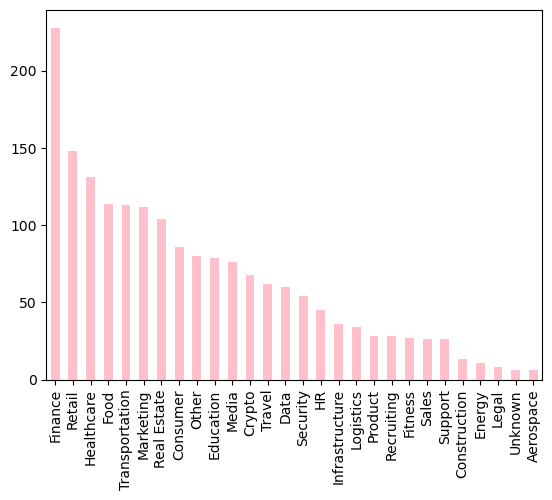

In [17]:
df["Industry"].value_counts().plot.bar(color="pink")

In [18]:
#Stage Distribution in Dataset

df["Stage"].value_counts()

Unknown           313
Series B          255
IPO               252
Series C          250
Series D          191
Series A          146
Acquired          124
Series E           94
Seed               59
Series F           47
Private Equity     32
Series H           21
Series G           12
Series J            7
Series I            6
Name: Stage, dtype: int64

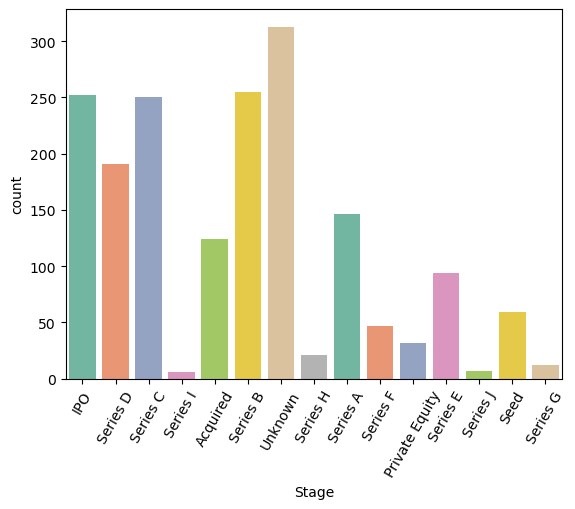

In [19]:
sns.countplot(x=df["Stage"],palette="Set2")
plt.xticks(rotation=60)
plt.show()

In [20]:
#Country Distribution in Dataset

df["Country"].value_counts()

United States           1192
India                    112
Canada                    77
Brazil                    57
United Kingdom            57
Germany                   50
Israel                    43
Australia                 35
Singapore                 28
Indonesia                 23
Sweden                    17
China                     11
Nigeria                    8
United Arab Emirates       6
Kenya                      6
Hong Kong                  5
Netherlands                5
Argentina                  5
Ireland                    4
Norway                     4
Mexico                     4
Estonia                    4
Denmark                    4
Colombia                   3
Pakistan                   3
Vietnam                    3
Malaysia                   3
Seychelles                 3
Austria                    3
Luxembourg                 3
Romania                    2
Portugal                   2
Switzerland                2
Egypt                      2
Chile         

In [21]:
#Top 20 County distribution

df["Country"].value_counts().head(20)

United States           1192
India                    112
Canada                    77
Brazil                    57
United Kingdom            57
Germany                   50
Israel                    43
Australia                 35
Singapore                 28
Indonesia                 23
Sweden                    17
China                     11
Nigeria                    8
United Arab Emirates       6
Kenya                      6
Hong Kong                  5
Netherlands                5
Argentina                  5
Ireland                    4
Norway                     4
Name: Country, dtype: int64

<AxesSubplot:>

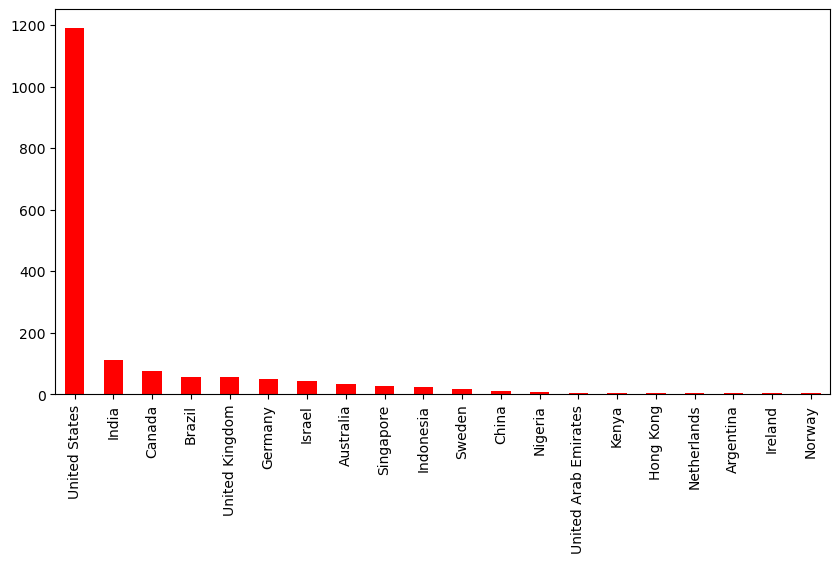

In [22]:
df["Country"].value_counts().head(20).plot.bar(color="red",figsize=(10,5))

In [23]:
df.isnull().sum()

Company             0
Location            0
Industry            0
Laid_Off_Count    539
Percentage        588
Date                1
Funds_Raised      134
Stage               0
Country             0
dtype: int64

In [24]:
#Imputing Null values

df["Date"].fillna(df["Date"].mode()[0],inplace=True)

In [25]:
df["Date"]

0       2022-12-14
1       2022-12-14
2       2022-12-14
3       2022-12-14
4       2022-12-13
           ...    
1804    2020-03-13
1805    2020-03-13
1806    2020-03-12
1807    2020-03-11
1808    2020-04-02
Name: Date, Length: 1809, dtype: object

In [26]:
df["Date"].isnull().sum()

0

In [27]:
df["Laid_Off_Count"].sum()

247517.0

In [28]:
#Top 20 countries with most number of Lay offs


Laid_off_country_wise=df[["Country","Laid_Off_Count"]].groupby("Country").sum().sort_values("Laid_Off_Count",ascending=False)
Laid_off_country_wise

,Laid_Off_Count
Country,
United States,162533.0
India,31236.0
Brazil,8110.0
Singapore,5801.0
Canada,5199.0
Netherlands,5070.0
United Kingdom,4870.0
China,4430.0
Germany,4283.0


<AxesSubplot:xlabel='Country'>

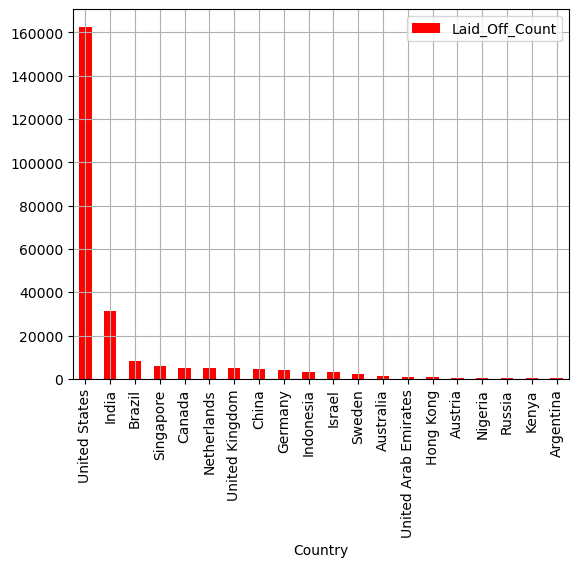

In [29]:
#Top 20 countries with most number of Lay offs

Laid_off_country_wise.head(20).plot.bar(color="red",grid=True)

In [30]:
#Top 20 LocationSs with most number of Lay offs


Laid_off_location_wise=df[["Location","Laid_Off_Count"]].groupby("Location").sum().sort_values("Laid_Off_Count",ascending=False)
Laid_off_location_wise.head(20)

,Laid_Off_Count
Location,
SF Bay Area,80578.0
New York City,22043.0
Bengaluru,17700.0
Seattle,16051.0
Boston,7430.0
Sao Paulo,6910.0
Los Angeles,5878.0
Singapore,5861.0
Mumbai,5525.0


<AxesSubplot:xlabel='Location'>

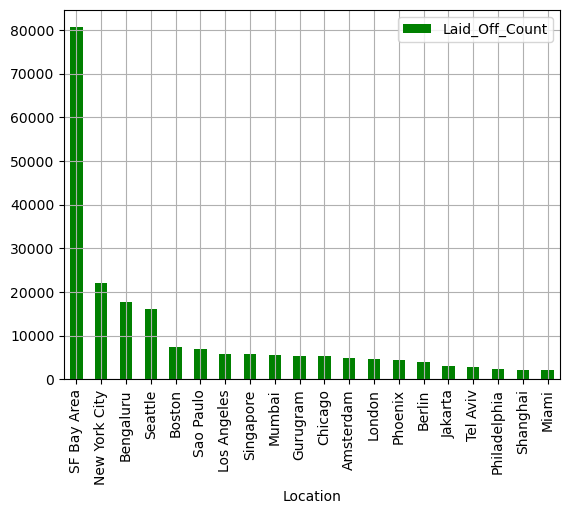

In [31]:
Laid_off_location_wise.head(20).plot.bar(color="green",grid=True)

In [32]:
df["Stage"].value_counts()

Unknown           313
Series B          255
IPO               252
Series C          250
Series D          191
Series A          146
Acquired          124
Series E           94
Seed               59
Series F           47
Private Equity     32
Series H           21
Series G           12
Series J            7
Series I            6
Name: Stage, dtype: int64

In [33]:
#Stages with most number of Lay offs


Laid_off_stage_wise=df[["Stage","Laid_Off_Count"]].groupby("Stage").sum().sort_values("Laid_Off_Count",ascending=False)
Laid_off_stage_wise

,Laid_Off_Count
Stage,
IPO,98040.0
Unknown,35360.0
Acquired,19578.0
Series D,17192.0
Series C,16799.0
Series B,13129.0
Series E,9945.0
Series F,8836.0
Series H,6389.0


<AxesSubplot:xlabel='Stage'>

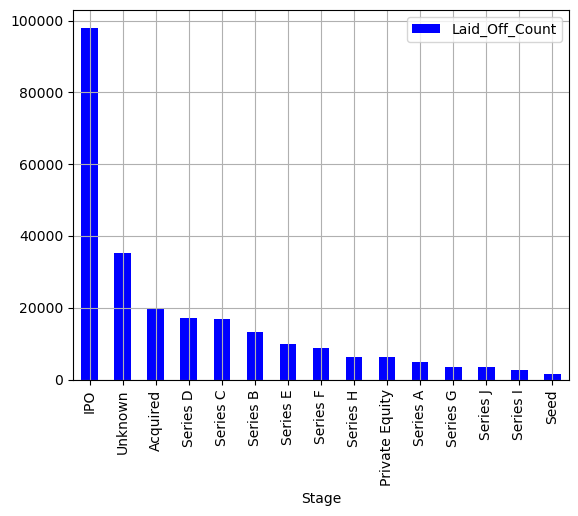

In [34]:
Laid_off_stage_wise.plot.bar(color="blue",grid=True)

In [35]:
#Stages with most number of Lay offs and Funding raised


Laid_off_stage_wise2=df.groupby("Stage").sum().sort_values("Laid_Off_Count",ascending=False)[["Laid_Off_Count","Funds_Raised"]]
Laid_off_stage_wise2

,Laid_Off_Count,Funds_Raised
Stage,,
IPO,98040.0,886832.9000
Unknown,35360.0,127129.6000
Acquired,19578.0,18687.4000
Series D,17192.0,64744.6000
Series C,16799.0,49145.8000
Series B,13129.0,24684.5800
Series E,9945.0,49623.0000
Series F,8836.0,42327.8000
Series H,6389.0,89691.0000


<AxesSubplot:xlabel='Stage'>

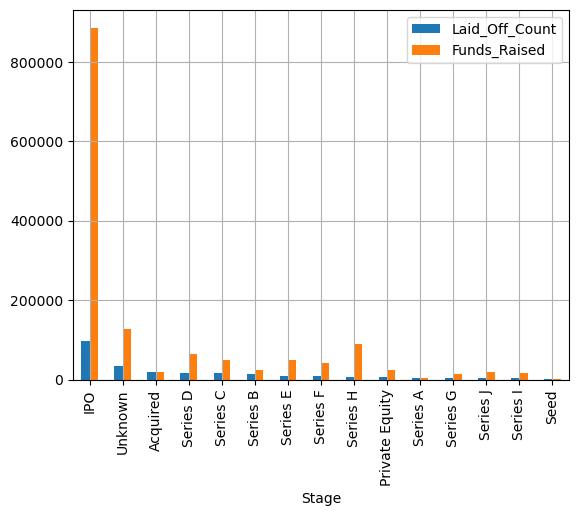

In [36]:
Laid_off_stage_wise2.plot.bar(grid=True)

In [37]:
#Most Affected Industries

Laid_off_industry_wise=df[["Industry","Laid_Off_Count"]].groupby("Industry").sum().sort_values("Laid_Off_Count",ascending=False)
Laid_off_industry_wise

,Laid_Off_Count
Industry,
Transportation,29575.0
Consumer,29354.0
Retail,27801.0
Finance,21067.0
Food,20025.0
Real Estate,16364.0
Travel,15476.0
Healthcare,12193.0
Education,11286.0


<AxesSubplot:ylabel='Lay off (%)'>

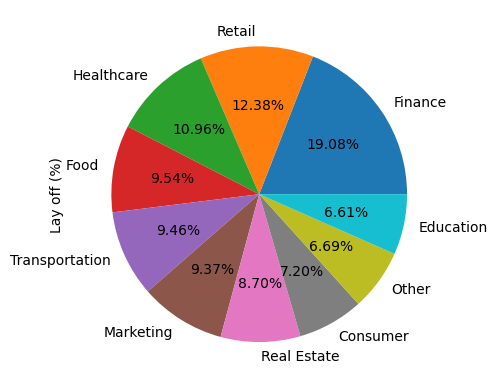

In [38]:
#Top 10 Most Affected Industries because of Lay Offs

df.value_counts("Industry").head(10).plot.pie(y="Laid_Off_Counts",ylabel='Lay off (%)',autopct='%1.2f%%')

In [39]:
#Top 20 Companies with most number of Lay Offs

Laid_off_Company_wise=df[["Company","Laid_Off_Count"]].groupby("Company").sum().sort_values("Laid_Off_Count",ascending=False)
Laid_off_Company_wise.head(20)

,Laid_Off_Count
Company,
Meta,11000.0
Amazon,10000.0
Uber,7585.0
Booking.com,4601.0
Cisco,4100.0
Peloton,4084.0
Carvana,4000.0
Better.com,3900.0
Bytedance,3750.0


<AxesSubplot:xlabel='Company'>

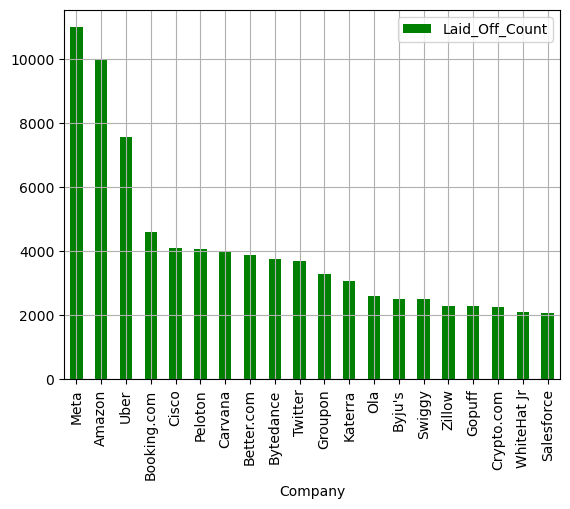

In [40]:
#Top 20 Companies with most number of Lay Offs

Laid_off_Company_wise.head(20).plot(kind="bar",color="green",grid=True)

In [41]:
df.isnull().sum()

Company             0
Location            0
Industry            0
Laid_Off_Count    539
Percentage        588
Date                0
Funds_Raised      134
Stage               0
Country             0
dtype: int64

In [42]:
#Filling all the null values with 0 in Laid Off Column

df["Laid_Off_Count"].fillna(0,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1809 non-null   object 
 1   Location        1809 non-null   object 
 2   Industry        1809 non-null   object 
 3   Laid_Off_Count  1809 non-null   float64
 4   Percentage      1221 non-null   float64
 5   Date            1809 non-null   object 
 6   Funds_Raised    1675 non-null   float64
 7   Stage           1809 non-null   object 
 8   Country         1809 non-null   object 
dtypes: float64(3), object(6)
memory usage: 127.3+ KB


In [44]:
df["Percentage"].describe()

count    1221.000000
mean        0.273557
std         0.264559
min         0.000000
25%         0.100000
50%         0.180000
75%         0.320000
max         1.000000
Name: Percentage, dtype: float64

In [45]:
#Filling null values in percentage column with mean val

In [46]:
percent_mean=df["Percentage"].mean()
percent_mean

0.27355651105651135

In [52]:
df["Percentage"].fillna(percent_mean,inplace=True)

In [55]:
df["Percentage"].isnull().sum()

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1809 non-null   object 
 1   Location        1809 non-null   object 
 2   Industry        1809 non-null   object 
 3   Laid_Off_Count  1809 non-null   float64
 4   Percentage      1809 non-null   float64
 5   Date            1809 non-null   object 
 6   Funds_Raised    1675 non-null   float64
 7   Stage           1809 non-null   object 
 8   Country         1809 non-null   object 
dtypes: float64(3), object(6)
memory usage: 127.3+ KB


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Funds_Raised', ylabel='Density'>

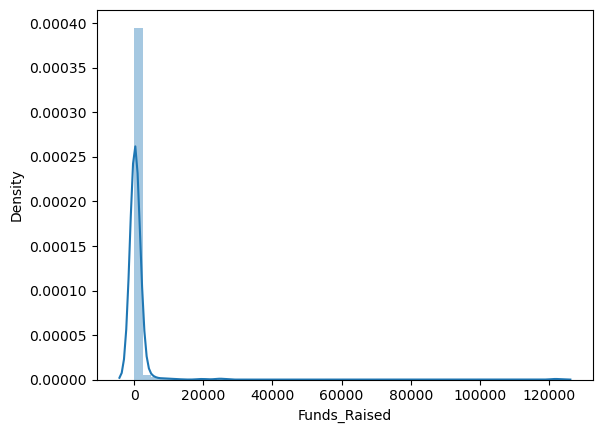

In [68]:
#We can clearly see that the data is skewed in this column.

sns.distplot(df["Funds_Raised"])

In [69]:
df["Funds_Raised"].median()

137.0

In [72]:
df["Funds_Raised"].fillna(df["Funds_Raised"].median(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1809 non-null   object 
 1   Location        1809 non-null   object 
 2   Industry        1809 non-null   object 
 3   Laid_Off_Count  1809 non-null   float64
 4   Percentage      1809 non-null   float64
 5   Date            1809 non-null   object 
 6   Funds_Raised    1809 non-null   float64
 7   Stage           1809 non-null   object 
 8   Country         1809 non-null   object 
dtypes: float64(3), object(6)
memory usage: 127.3+ KB


In [75]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,Year,Month,Day
0,JD.ID,Jakarta,Retail,200.0,0.300000,2022-12-14,5100.0,IPO,Indonesia,2022,12,14
1,GoStudent,Vienna,Education,100.0,0.273557,2022-12-14,686.0,Series D,Austria,2022,12,14
2,ChowNow,Los Angeles,Food,40.0,0.100000,2022-12-14,64.0,Series C,United States,2022,12,14
3,Landing,Birmingham,Real Estate,0.0,0.273557,2022-12-14,347.0,Series C,United States,2022,12,14
4,Thumbtack,SF Bay Area,Consumer,160.0,0.140000,2022-12-13,698.0,Series I,United States,2022,12,13


In [76]:
df.drop("Date",axis=1,inplace=True)

In [77]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Funds_Raised,Stage,Country,Year,Month,Day
0,JD.ID,Jakarta,Retail,200.0,0.300000,5100.0,IPO,Indonesia,2022,12,14
1,GoStudent,Vienna,Education,100.0,0.273557,686.0,Series D,Austria,2022,12,14
2,ChowNow,Los Angeles,Food,40.0,0.100000,64.0,Series C,United States,2022,12,14
3,Landing,Birmingham,Real Estate,0.0,0.273557,347.0,Series C,United States,2022,12,14
4,Thumbtack,SF Bay Area,Consumer,160.0,0.140000,698.0,Series I,United States,2022,12,13
